In [16]:
import zipfile
import pandas as pd

zip_file_path = 'archive (2).zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('lenta-ru-news.csv') as file:
        df = pd.read_csv(file)

print(df.head())

                                           url  \
0   https://lenta.ru/news/1914/09/16/hungarnn/   
1  https://lenta.ru/news/1914/09/16/lermontov/   
2  https://lenta.ru/news/1914/09/17/nesteroff/   
3   https://lenta.ru/news/1914/09/17/bulldogn/   
4       https://lenta.ru/news/1914/09/18/zver/   

                                               title  \
0  1914. Русские войска вступили в пределы Венгрии     
1  1914. Празднование столетия М.Ю. Лермонтова от...   
2                           1914. Das ist Nesteroff!   
3                    1914. Бульдог-гонец под Льежем    
4           1914. Под Люблином пойман швабский зверь   

                                                text       topic  \
0  Бои у Сопоцкина и Друскеник закончились отступ...  Библиотека   
1  Министерство народного просвещения, в виду про...  Библиотека   
2  Штабс-капитан П. Н. Нестеров на днях, увидев в...  Библиотека   
3  Фотограф-корреспондент Daily Mirror рассказыва...  Библиотека   
4  Лица, приехавшие в 

/var/folders/3g/gfj4tgsn4hb80t19wl30jk100000gq/T/ipykernel_50733/844927642.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [18]:
from sklearn.cluster import Birch
from sklearn.feature_extraction.text import TfidfVectorizer
from umap.umap_ import UMAP

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
dftxt = df['text'].values
random.shuffle(dftxt)

In [20]:
news = np.array(dftxt[:40000])

In [300]:
vectorizer = TfidfVectorizer(max_features = 6000)
tfidf_matrix = vectorizer.fit_transform(news[:40000])

In [301]:
vectors = vectorizer.transform(news[:40000])
vectors.shape

(40000, 6000)

In [302]:
bam = UMAP(n_components=2, n_neighbors=100, metric='cosine', min_dist=0.02)

In [303]:
reduced_emb = bam.fit_transform(vectors)

In [305]:
df = pd.DataFrame()
df['x'] = reduced_emb[:, 0]
df['y'] = reduced_emb[:, 1]

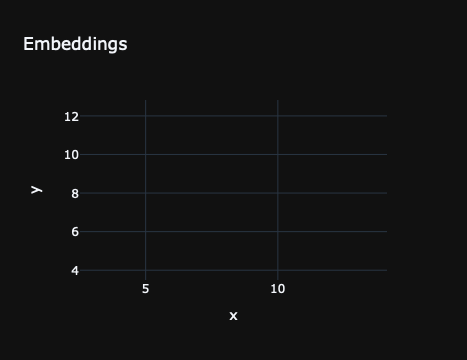

In [306]:
import plotly.express as px
hover_data = {
    "x": False,
    "y": False
}
fig = px.scatter(df, x="x", y="y", template="plotly_dark",
                   title="Embeddings", hover_data=hover_data)
fig.update_layout(showlegend=False)
fig.show()

In [259]:
Kmean = KMeans(n_clusters = 4)
Kmean.fit(reduced_emb)
y_kmeans = Kmean.predict(reduced_emb)

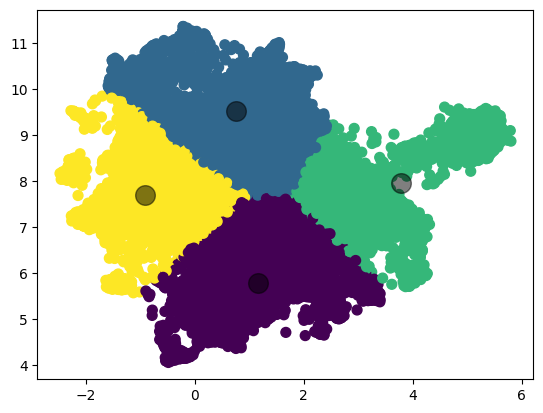

In [260]:
plt.scatter(reduced_emb[:, 0], reduced_emb[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = Kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [48]:
from sklearn.cluster import Birch
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1)

model.fit(reduced_emb)

pred = model.predict(reduced_emb)

In [49]:
cluster_labels = model.labels_
cluster_labels.max()

10

In [50]:
cnt = 0
for i in range(len(pred)):
    cnt += (pred[i] == -1)
print(cnt)

0


In [51]:
num_economy = []
for i in range(100):
    if pred[i] == 1:
        print(news[i])


120 участников ликвидации последствий на Чернобыльской атомной электростанции обратились в Верховный суд Кабардино-Балкарии с просьбой пересмотреть дело об отказе в выплате компенсации морального вреда. Рассмотрение исков шести человек начнется 12 июля, сообщил «Кавказскому узлу» адвокат Магомед Абубакаров. Основанием для обращения в суд стало решение Европейского суда по правам человека (ЕСПЧ) от 7 ноября 2017 года, согласно которому отмена решений о компенсациям ликвидаторам и сама процедура пересмотра этих решений нарушили права граждан на справедливое судебное разбирательство. «Чернобыльцы потеряли здоровье, моральный вред, нанесенный им, продолжается и по настоящее время, а стало быть они имели право на получении компенсаций», — отметил адвокат. Против пересмотра дел выступило управление Федерального казначейства по Кабардино-Балкарии. В ведомстве сообщили, не все решения ЕСПЧ могут быть поводом для пересмотра судебных актов, а компенсации «не подлежат возмещению». В начале 2010-х

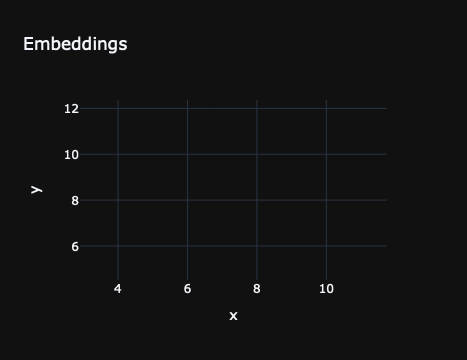

In [298]:
reduced_emb = UMAP(n_components=2, n_neighbors=100, metric='cosine', min_dist=0.02).fit_transform(vectors)
df = pd.DataFrame()
df['x'] = reduced_emb[:, 0]
df['y'] = reduced_emb[:, 1]
import plotly.express as px
hover_data = {
    "x": False,
    "y": False
}
fig = px.scatter(df, x="x", y="y", template="plotly_dark",
                   title="Embeddings", hover_data=hover_data)
fig.update_layout(showlegend=False)
fig.show()

In [63]:
from sklearn.cluster import Birch
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1)

model.fit(reduced_emb)

pred = model.predict(reduced_emb)

Тесты на инференс

In [28]:
texti = np.array(dftxt[60000:60010])
print(texti)
dump(texti, 'text.joblib')

['"Если Соединенные Штаты предпримут акции возмездия в связи с терактами в Нью-Йорке и Вашингтоне, то официальный Токио окажет им максимально возможную поддержку в рамках своей конституции" , - заявил в четверг журналистам секретарь кабинета министров Японии Ясуо Фукуда. С таким же заявлением выступил и премьер-министр Австралии Джон Андерсон, сообщает MIGNews.com. Он  подчеркнул, что Австралия может привести в действие положение, записанное в двустороннем договоре с США. Согласно этому положению Австралия может и готова принять участие в ответных военных действиях США, поскольку террористические атаки в данном случае рассматриваются как посягательство на интересы Австралии.'
 'Лидер "Яблока" Григорий Явлинский в целом поддерживает идею выдвижения единого кандидата от демократических сил на президентских выборах, однако сам не намерен отказываться от участия в избирательном марафоне, сообщает РИА "Новости". Явлинский заявил в пятницу журналистам, что не снимет свою кандидатуру "ни при 

['text.joblib']

In [361]:
vecs = vectorizer.transform(texti)

In [368]:
preds = obj.transform(vecs)

In [369]:
print(preds)

[[3.7844775 8.31572  ]]


In [83]:
zeropred = model.predict(preds)

In [84]:
print(zeropred)

[6]


In [323]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size = 69, min_samples = 5,prediction_data=True)
labels = clusterer.fit_predict(reduced_emb)
print(f"Num of clusters: {labels.max() + 1}")

df["label"] = [str(label) for label in labels]
df['text_short'] = [str(new)[:300] for new in news]
num_outliers = len(df[df["label"] == "-1"])
print(f"Num of outliers: {num_outliers} ({num_outliers / len(df) * 100:.2f} % of total)")

print(labels)

Num of clusters: 106
Num of outliers: 12460 (31.15 % of total)
[97 95 79 ... -1 78 -1]


In [199]:
ans.append('Apple')

In [200]:
print(ans)

['Бои', 'Наука', 'Мода', 'Теннис', 'Футбол', 'Космос', 'Shit', 'Белоруссия', 'Газ', 'КНДР', 'Курс рубля', 'Фондовый рынок', 'Израильско-палестинских', 'Сериалы', 'Apple']


In [345]:
print(dftxt[60007])

В США католическая епархия Девенпорта заявила о своей финансовой несостоятельности и обратилась к властям с просьбой применить в ее отношении 11 главу федерального Кодекса о банкротстве, предполагающую полную реструктуризацию ее активов, сообщается на официальном сайте епархии. Причиной ее плачевного состояния стали многочисленные иски против ее священнослужителей, обвинявшихся в сексуальных домогательствах. Как утверждает AP, в общей сложности епархия была вынуждена выплатить более 10,5 миллиона долларов. "Решение о реорганизации - лучший способ для нашей церкви продолжить свою миссию", - говорится в специальном обращении епископа Уилльяма Франклина, опубликованном на сайте. По его утверждению, епархии еще предстоит ответить по 25 новым искам, которые были поданы против ее священнослужителей, в том числе, против ушедшего в отставку епископа Лоурэнса Соэнса.


In [266]:
ansi = [-1] * 1000
print(ansi)
vecs = vectorizer.transform(texti)
for i in range(10):
    preds = bam.transform(vecs)
    zeropred = hdbscan.approximate_predict(clusterer, preds)
    for i in range(1000):
        if zeropred[0][i] != -1:
            ansi[i] = zeropred[0][i]
print(ansi)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [268]:
for i in range(1000):
    if ansi[i] == -1:
        cnt += 1
print(cnt)

157


In [269]:
print(len(news))

40000


In [272]:
print(len(labels))
indexes = []
for i in range(len(labels)):
    if labels[i] == -1:
        indexes.append(i)
print(len(indexes))

40000
12271


In [273]:
filtered_news = [news[i] for i in range(len(news)) if i in indexes]
    

In [274]:
print(len(filtered_news))

12271


In [275]:
df = pd.DataFrame({'text': filtered_news})

In [276]:
print(df)

                                                    text
0      Министерство иностранных дел РФ предъявило уль...
1      Французский композитор Мишель Легран скончался...
2      Министерство туризма Эквадора в ближайшее воск...
3      Энергетическая компания USEC Inc., которая зан...
4      В Москве прошли похороны тележурналиста и путе...
...                                                  ...
12266  Группа скинхедов совершила нападение на пассаж...
12267  Оппозиционеры 18 октября подали новое уведомле...
12268  LG Household & Healthcare, структурное подразд...
12269  В университете немецкого города Веймар был раз...
12270  На юго-востоке Москвы четверо грабителей с топ...

[12271 rows x 1 columns]


In [277]:
df.to_csv('outliers.csv', index=False)

In [280]:
filtered_news = np.array(filtered_news)

In [282]:
vectorizer1 = TfidfVectorizer(max_features = 6000)
tfidf_matrix = vectorizer1.fit_transform(filtered_news)

In [285]:
vectori = vectorizer1.transform(filtered_news)
bam2 = UMAP(n_components=2, n_neighbors=100, metric='cosine', min_dist=0.02)

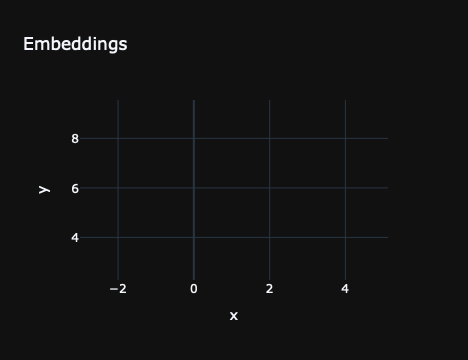

In [286]:
reduced_emb1 = bam2.fit_transform(vectori)
df = pd.DataFrame()
df['x'] = reduced_emb1[:, 0]
df['y'] = reduced_emb1[:, 1]
import plotly.express as px
hover_data = {
    "x": False,
    "y": False
}
fig = px.scatter(df, x="x", y="y", template="plotly_dark",
                   title="Embeddings", hover_data=hover_data)
fig.update_layout(showlegend=False)
fig.show()

In [287]:
import hdbscan
clusterer1 = hdbscan.HDBSCAN(min_cluster_size = 69, min_samples = 5,prediction_data=True)
labels1 = clusterer1.fit_predict(reduced_emb1)
print(f"Num of clusters: {labels.max() + 1}")

df["label"] = [str(label) for label in labels1]
num_outliers = len(df[df["label"] == "-1"])
print(f"Num of outliers: {num_outliers} ({num_outliers / len(df) * 100:.2f} % of total)")

print(labels1)

Num of clusters: 105
Num of outliers: 814 (6.63 % of total)
[ 2  2  2 ...  2  2 -1]


In [292]:
print(labels1[200:300])

[-1  2  2 -1  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  0  2  2  2  2  2  2  2  2
 -1  2  2  2  2  2  2 -1  2  2  2 -1  2  2  2  2 -1  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  0  2  2 -1  2  2  2  2  2  2
  2  2  2  2]


In [312]:
print(df)
print(labels.max())

               x          y label  \
0       8.571609  10.636412    97   
1       9.868986   8.570933    95   
2       9.537162   7.836221    79   
3      10.835293   8.647393    57   
4       6.252933   7.096278    72   
...          ...        ...   ...   
39995   8.926167   7.388403    -1   
39996   9.408639   5.788463    -1   
39997   7.978627   6.179260    -1   
39998   9.388100   6.533302    78   
39999   8.609113   9.701840    -1   

                                              text_short  
0      Московский метрополитен не планирует перекрыва...  
1      МВД возобновило расследование хищения бюджетны...  
2      120 участников ликвидации последствий на Черно...  
3      Министерство иностранных дел РФ предъявило уль...  
4      Британский актер Руперт Гринт исполнит главную...  
...                                                  ...  
39995  Московский арбитражный суд отложил до 2 феврал...  
39996  Розничные цены на марихуану в Колорадо выросли...  
39997  LG Household & He

In [310]:
from openai import OpenAI

In [329]:
client = OpenAI(api_key='sk-8l3dfizD4UPDqKwEXuOkzVXhEjnsJIgL', base_url="https://api.proxyapi.ru/openai/v1")


def get_tag(texts):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "system",
                "content": "Тебе дадут несколько новостей, тебе нужно понять что в них общее, написать их общую тему, то есть о чем они. Ты должен описать эту тему один или двуми словами"
            },
            {
                "role": "user",
                "content": texts

            }
        ],
        temperature=0.7,
        max_tokens=64,
        top_p=1
    )
    return response.choices[0].message.content

claster_names = dict()
for i in range(labels.max()):
    texts = ''
    df_subset = df[df["label"] == str(i)].reset_index()
    cnt = 0
    for j,row in df_subset.iterrows():
        texts += '/n' + row['text_short']
        cnt += 1
        if cnt == 20:
            break
    tag = get_tag(texts)
    claster_names[i] = tag

In [330]:
print(claster_names)

{0: 'Бокс, ММА', 1: 'Спортивные события', 2: 'Северная Корея', 3: 'Ядерная энергетика', 4: 'Конфликт Грузии', 5: 'Курс валют', 6: 'Фондовые рынки', 7: 'Политика в Белоруссии', 8: 'Климатические явления', 9: 'Газопроводы', 10: 'Геополитика НАТО', 11: 'Видеоигры', 12: 'Космос', 13: 'Наука', 14: 'Мировая мода', 15: 'Конфликты в Израиле и Палестине', 16: 'Энергетика', 17: 'Финансовый кризис в Европе', 18: 'Нефтяная индустрия.', 19: 'Сериалы', 20: 'катастрофы на море', 21: 'Авиационные происшествия', 22: 'Военная авиация', 23: 'Авиационная безопасность', 24: 'Разработка и испытания ракетных комплексов', 25: 'Военная техника', 26: 'Авиационные происшествия', 27: 'Авиакатастрофы', 28: 'Гражданская война в Ливии', 29: 'Международная политика', 30: 'Иранская ядерная программа', 31: 'Государственные и социальные инициативы', 32: 'Конфликт вокруг Крыма', 33: 'Украинская политика', 34: 'Вооруженный конфликт в Донбассе', 35: 'Европейский Союз', 36: 'Украина', 37: 'Международная политика', 38: 'Терр

In [335]:
print(claster_names)
dataf1 = pd.DataFrame.from_dict(claster_names)
print(dataf1)

{0: 'Бокс, ММА', 1: 'Спортивные события', 2: 'Северная Корея', 3: 'Ядерная энергетика', 4: 'Конфликт Грузии', 5: 'Курс валют', 6: 'Фондовые рынки', 7: 'Политика в Белоруссии', 8: 'Климатические явления', 9: 'Газопроводы', 10: 'Геополитика НАТО', 11: 'Видеоигры', 12: 'Космос', 13: 'Наука', 14: 'Мировая мода', 15: 'Конфликты в Израиле и Палестине', 16: 'Энергетика', 17: 'Финансовый кризис в Европе', 18: 'Нефтяная индустрия.', 19: 'Сериалы', 20: 'катастрофы на море', 21: 'Авиационные происшествия', 22: 'Военная авиация', 23: 'Авиационная безопасность', 24: 'Разработка и испытания ракетных комплексов', 25: 'Военная техника', 26: 'Авиационные происшествия', 27: 'Авиакатастрофы', 28: 'Гражданская война в Ливии', 29: 'Международная политика', 30: 'Иранская ядерная программа', 31: 'Государственные и социальные инициативы', 32: 'Конфликт вокруг Крыма', 33: 'Украинская политика', 34: 'Вооруженный конфликт в Донбассе', 35: 'Европейский Союз', 36: 'Украина', 37: 'Международная политика', 38: 'Терр

ValueError: If using all scalar values, you must pass an index

In [336]:
import csv
csv_file_path = 'output.csv'


with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    # Write each key-value pair as a row in the CSV file
    for key, value in claster_names.items():
        writer.writerow([key, value])

print("CSV file saved successfully!")

CSV file saved successfully!


In [12]:
import joblib
import pickle

In [378]:
dump(bam, 'umap_model.joblib')

['umap_model.joblib']

In [379]:
dump(vectorizer, 'tfidf.joblib')

['tfidf.joblib']

In [380]:
dump(clusterer, 'hdbscan.joblib')

['hdbscan.joblib']

In [24]:
umapi = joblib.load('umap_model.joblib')
vectorizeri = joblib.load('tfidf.joblib')
clasteri = joblib.load('hdbscan.joblib')

/Users/g.zlotin/Library/Caches/pypoetry/virtualenvs/etna-S9b0lPai-py3.10/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/g.zlotin/Library/Caches/pypoetry/virtualenvs/etna-S9b0lPai-py3.10/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AttributeError: Can't get attribute 'EuclideanDistance' on <module 'sklearn.metrics._dist_metrics' from '/Users/g.zlotin/Library/Caches/pypoetry/virtualenvs/etna-S9b0lPai-py3.10/lib/python3.10/site-packages/sklearn/metrics/_dist_metrics.cpython-310-darwin.so'>

In [15]:
dump(obj, 'oro.joblib')

['oro.joblib']

In [11]:
print(obj)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.02, n_neighbors=100, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})
